In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from collections import OrderedDict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
%matplotlib inline

In [2]:
from sklearn import set_config
set_config(print_changed_only=False)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [5]:
dfraud=df[df['isFraud']==1]

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
2384900.66           1
573230.90            1
444426.88            1
170489.19            1
324704.47            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [9]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [10]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
28209542.84          1
529734.16            1
499717.38            1
531125.34            1
2011.42              1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [11]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
2384900.66           1
573230.90            1
444426.88            1
170489.19            1
324704.47            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [12]:
df['nameOrig'].value_counts()

C1677795071    3
C2051359467    3
C1530544995    3
C1902386530    3
C2098525306    3
              ..
C655078432     1
C296437412     1
C920654796     1
C637670442     1
C99590875      1
Name: nameOrig, Length: 6353307, dtype: int64

In [13]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M504364124       1
M1884526424      1
C1425862027      1
M1874713397      1
M1313651095      1
Name: nameDest, Length: 2722362, dtype: int64

In [14]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
28209542.84          1
529734.16            1
499717.38            1
531125.34            1
2011.42              1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [15]:
df['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
13823.21          1
470212.13         1
129355.16         1
186818.92         1
2.00              1
Name: amount, Length: 5316900, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [17]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [18]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [19]:
df.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [130]:
bins= [0,240,480,744]
labels = [1,2,3]
df['Time'] = pd.cut(df['step'], bins=bins, labels=labels, right=False)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Time,type-CASH_IN,type-CASH_OUT,type-DEBIT,type-PAYMENT,type-TRANSFER
1777056,162,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0,1,0,1,0,0,0
1350600,137,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0,1,0,0,0,1,0
1991933,179,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0,1,0,0,0,1,0
5092368,355,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0,2,0,0,0,1,0
5066515,354,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,3,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,3,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,3,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,3,0,0,0,0,1


In [136]:
bins= [0,240,480,744]
labels = [1,2,3]
dfraud['Time'] = pd.cut(dfraud['step'], bins=bins, labels=labels, right=False)
dfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Time
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,3
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,3
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,3
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,3


<AxesSubplot:xlabel='type', ylabel='amount'>

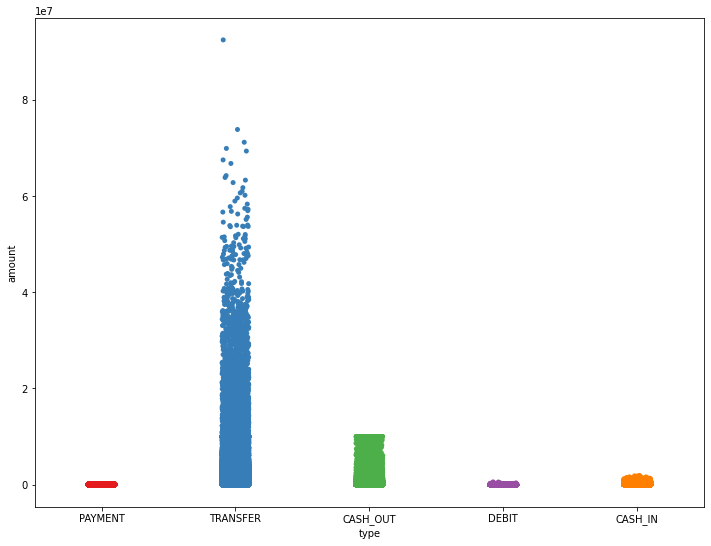

In [21]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'type', y = 'amount', data = df, palette='Set1')

<AxesSubplot:xlabel='type', ylabel='amount'>

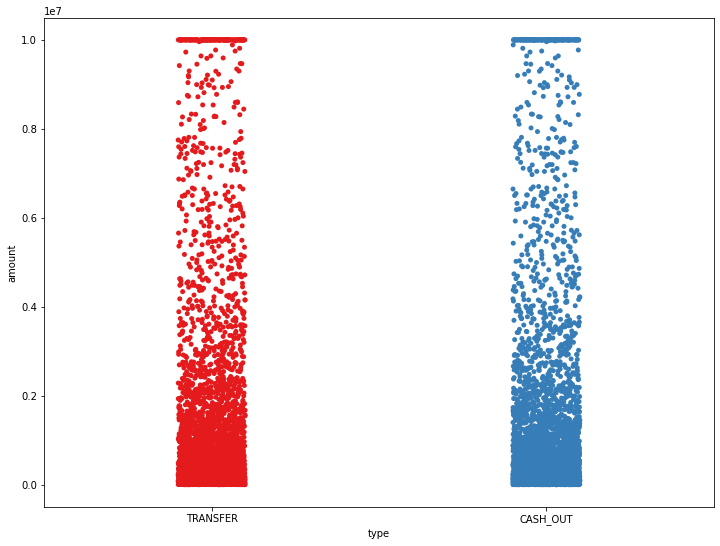

In [22]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'type', y = 'amount', data = dfraud, palette='Set1')

Fraud hanya terjadi pada transaksi dengan type cash_out dan Transfer

<AxesSubplot:xlabel='Time', ylabel='amount'>

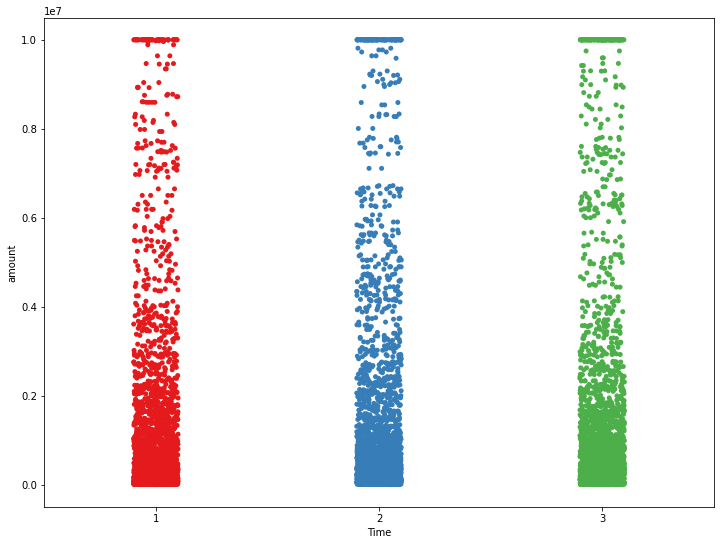

In [137]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'Time', y = 'amount', data = dfraud, palette='Set1')

In [138]:
df['Time'].value_counts()

1    6812
2    6305
3    3309
Name: Time, dtype: int64

Durasi Fraud tidak berpengaruh kepada jumlah, kebanyakan fraud dilakukan kurang dari 480 jam atau 20 hari.

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

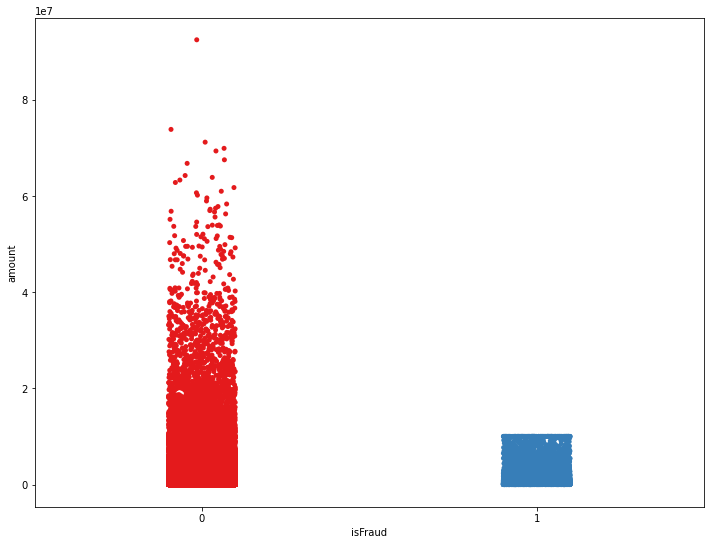

In [25]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'isFraud', y = 'amount', data = df, palette='Set1')

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='amount'>

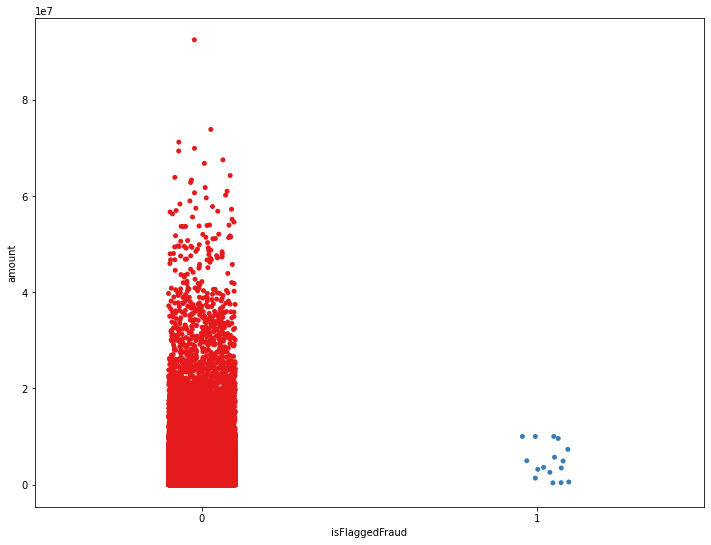

In [26]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'isFlaggedFraud', y = 'amount', data = df, palette='Set1')

In [27]:
(pd.crosstab(index=df['type'], columns = df['isFraud'],normalize= 'index')*100).round(2)

isFraud,0,1
type,,
CASH_IN,100.00,0.00
CASH_OUT,99.82,0.18
DEBIT,100.00,0.00
PAYMENT,100.00,0.00
TRANSFER,99.23,0.77


In [28]:
(pd.crosstab(index=df['type'], columns = df['isFlaggedFraud'],normalize= 'index')*100).round(2)

isFlaggedFraud,0,1
type,,
CASH_IN,100.0,0.0
CASH_OUT,100.0,0.0
DEBIT,100.0,0.0
PAYMENT,100.0,0.0
TRANSFER,100.0,0.0


In [29]:
df.shape

(6362620, 12)

# Machine Learning #

In [30]:
from sklearn.utils import resample

In [31]:
non_fraud = df[df['isFraud'] == 0] ## Kelas Majority
fraud = df[df['isFraud'] == 1] ## Kelas Minority

In [32]:
non_fraud_undersample = resample(non_fraud, ## Kelas Majority yg akan di undersampling
                                replace=False,
                                n_samples = len(fraud), ## Jumlah Kelas Minority
                                random_state = 42)

In [33]:
df = pd.concat([non_fraud_undersample, fraud])

In [37]:
df=pd.get_dummies(data=df, columns=['type'], prefix_sep='-')

In [34]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'Time'],
      dtype='object')

In [35]:
df['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [36]:
df['isFlaggedFraud'].value_counts()

0    16410
1       16
Name: isFlaggedFraud, dtype: int64

In [39]:
X = df.drop(columns=['isFlaggedFraud','isFraud','step','nameOrig','nameDest'])
y = df['isFraud']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 0)

# KNN #

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_cf=KNeighborsClassifier()
knn_cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
print(knn_cf.score(X_train,y_train))

0.9692541856925418


In [43]:
param_KNN = {"n_neighbors" : [5, 10, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_cf, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [44]:
print(model_knn.score(X_train,y_train))

1.0


In [51]:
y_pred_knn = knn_cf.predict(X_test)
y_pred_knn_tuned = model_knn.predict(X_test)

In [50]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9528301886792453

In [52]:
acc_knn_tuned= accuracy_score(y_test, y_pred_knn_tuned)
acc_knn_tuned

0.9567863664029215

In [49]:
cm = confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn)

rec_knn = recall_score(y_test, y_pred_knn, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn)

recall_score(y_test, y_pred_knn, pos_label=0)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1630
           1       0.94      0.97      0.95      1656

    accuracy                           0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286



In [53]:
cm = confusion_matrix(y_test, y_pred_knn_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn_tuned)

rec_knn = recall_score(y_test, y_pred_knn_tuned, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn_tuned)

recall_score(y_test, y_pred_knn_tuned, pos_label=0)

print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1630
           1       0.95      0.97      0.96      1656

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



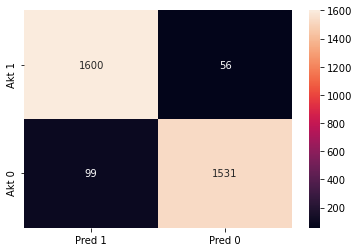

In [54]:
y_KNN = knn_cf.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

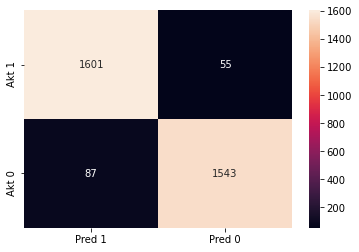

In [55]:
y_KNN = model_knn.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

# Random Forest #

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
print(RF.score(X_train,y_train))

1.0


In [58]:
param_RF = {"n_estimators" : [100, 200],
          "max_depth" : [None, 5],
          "min_samples_split" : [2, 9],
          "min_samples_leaf" : [1, 2],
          "max_features" : [None, .8]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  2.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [59]:
print(model_RF.score(X_train, y_train))

1.0


In [60]:
y_pred_rf = RF.predict(X_test)
y_pred_rf_tuned=model_RF.predict(X_test)

In [62]:
acc_RF = accuracy_score(y_test, y_pred_rf)
acc_RF

0.9911746804625685

In [65]:
acc_RF_tuned = accuracy_score(y_test, y_pred_rf_tuned)
acc_RF_tuned

0.9933049300060864

In [66]:
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



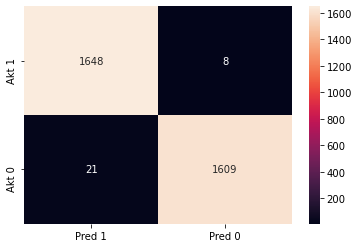

In [67]:
y_RF = RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

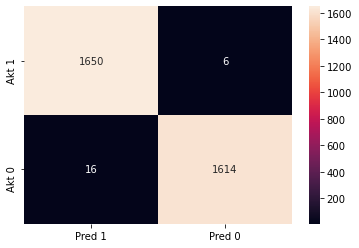

In [68]:
y_RF = model_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

# TREE #

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
print(tree.score(X_train,y_train))

1.0


In [88]:
param_tree = {"ccp_alpha" : [0],
          "max_depth" : [5],
          "min_samples_split" : [3],
          "min_samples_leaf" : [1],
          "max_features" : [None]}

model_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv = 4, n_jobs=-1, verbose=1)
model_tree.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [0], 'max_depth': [5],
                   

In [89]:
model_tree.score(X_train, y_train)

0.9846270928462709

In [90]:
y_pred_tree = tree.predict(X_test)
y_pred_tree_tuned = model_tree.predict(X_test)

In [91]:
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_tree

0.9899573950091296

In [92]:
acc_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
acc_tree_tuned

0.9841752891052952

In [93]:
cm = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_tree)

rec_RF = recall_score(y_test, y_pred_tree, pos_label=1)

f1_RF = f1_score(y_test, y_pred_tree)

recall_score(y_test, y_pred_tree, pos_label=0)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [94]:
cm = confusion_matrix(y_test, y_pred_tree_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_tree_tuned)

rec_RF = recall_score(y_test, y_pred_tree_tuned, pos_label=1)

f1_RF = f1_score(y_test, y_pred_tree_tuned)

recall_score(y_test, y_pred_tree_tuned, pos_label=0)

print(classification_report(y_test, y_pred_tree_tuned))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1630
           1       0.97      1.00      0.98      1656

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



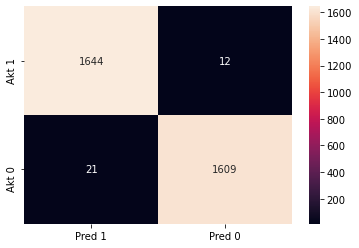

In [95]:
y_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

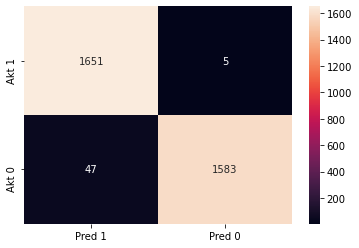

In [96]:
y_tree = model_tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [122]:
y_pred_tree= model_tree.predict(X_test)

In [123]:
roc_auc_score(y_test, y_pred_tree)

0.9840731602501406

In [124]:
y_proba_tree = tree.predict_proba(X_test)

In [125]:
pred_1 = y_proba_tree[ : , 1]

In [126]:
roc_curve(y_test, pred_1)

(array([0.        , 0.01288344, 1.        ]),
 array([0.        , 0.99275362, 1.        ]),
 array([2., 1., 0.]))

In [127]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [128]:
score_auc = round(auc(fpr, tpr),2)

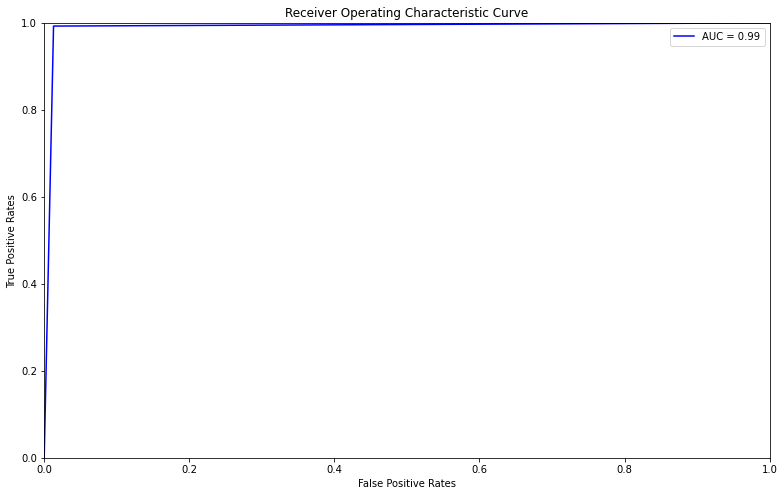

In [129]:
plt.figure(figsize=(13, 8))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
# plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()